<a href="https://colab.research.google.com/github/siddesai80/GaussianClassifier/blob/main/Gaussian_Classification_for_Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries and files

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

pd.set_option('display.max_columns', None)

In [63]:
# Reading the CSV files from Google Drive
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Uncertainty/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/Uncertainty/test.csv')

In [64]:
# Concating the dataset
dataframe = pd.concat([train_data,test_data])

# Data Analysis and Visulaization

In [65]:
print("Table Dimensions of the combined dataset - " ,dataframe.shape)

Table Dimensions of the combined dataset -  (129880, 25)


In [66]:
dataframe.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [67]:
# Dropping first two columns as they don't add much value
dataframe.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [68]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [69]:
dataframe.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [70]:
dataframe.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
satisfaction                           0
dtype: int64

In [71]:
# Dropping all rows where Arrival Delay in Minutes is null
dataframe = dataframe.dropna()
print("Table Dimensions after dropping rows with empty data - " ,dataframe.shape)

Table Dimensions after dropping rows with empty data -  (129487, 23)


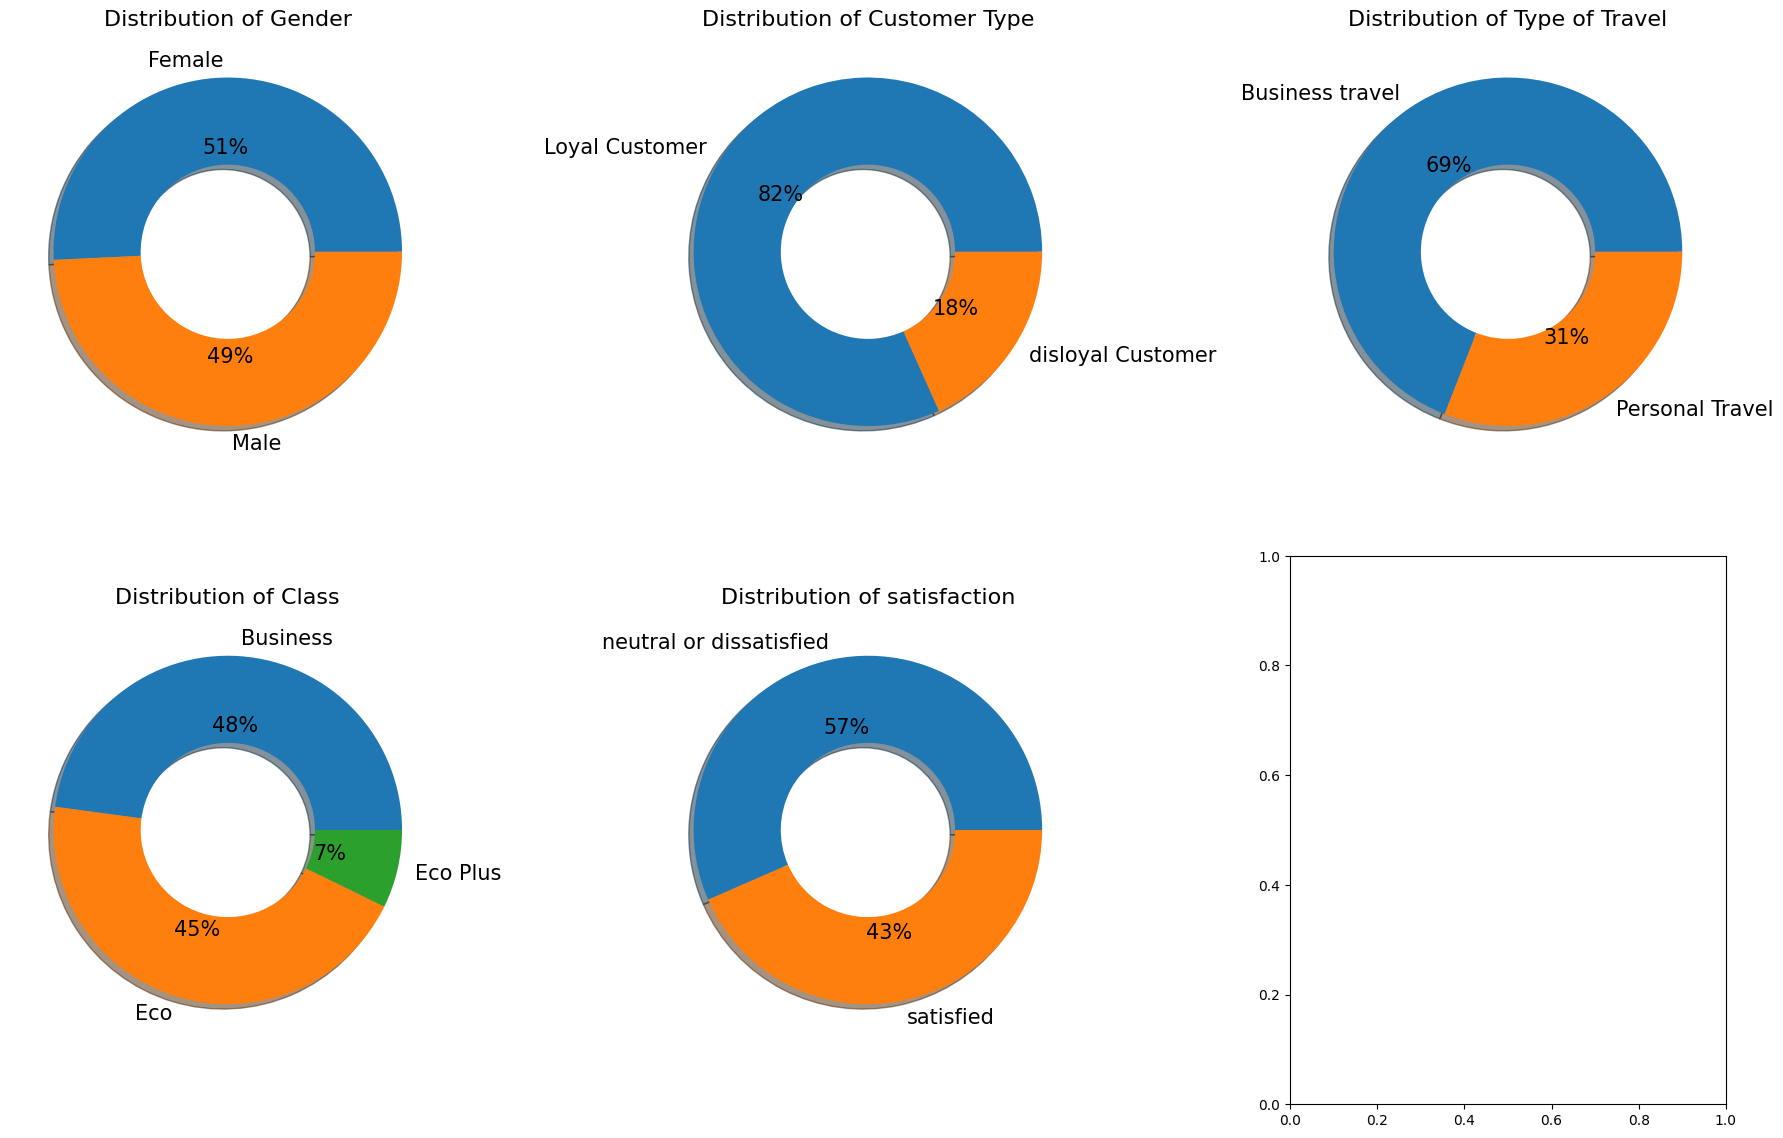

In [72]:
def plot_pie_charts(dataframe, column_names):
    
    num_columns = len(column_names)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (num_columns + 2) // 3
    num_cols = min(num_columns, 3)

    # Create a figure with subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*6, num_rows*6))

    # Iterate over the columns and plot the pie chart for each
    for i, col_name in enumerate(column_names):
        row_idx = i // num_cols
        col_idx = i % num_cols

        # Count the number of unique values in the column
        counts = dataframe[col_name].value_counts()

        # Plot the pie chart
        axs[row_idx, col_idx].pie(counts, 
                                  labels=counts.index, 
                                  autopct="%0.0f%%", 
                                  shadow=True, 
                                  wedgeprops={"width": 0.5}, 
                                  textprops={"fontsize": 15})
        axs[row_idx, col_idx].set_title(f"Distribution of {col_name}", fontsize=16)

    # Set the layout of the subplots
    plt.tight_layout()

    # Show the combined pie charts
    plt.show()


plot_pie_charts(dataframe, ["Gender", "Customer Type","Type of Travel","Class","satisfaction"])



---

*   Upon observing the data, it is apparent that the number of males and females is nearly equal, with a slight disparity.
*   The count of loyal customers significantly exceeds the count of disloyal customers.
*   People travelling for Business are more than people travelling for Leisure.
*   The Airline has three classes and only a few choose Eco Plus.
*   There is a discernible contrast present. The percentage of neutral or dissatisfied passengers is approximately 14% higher than the percentage of satisfied passengers.



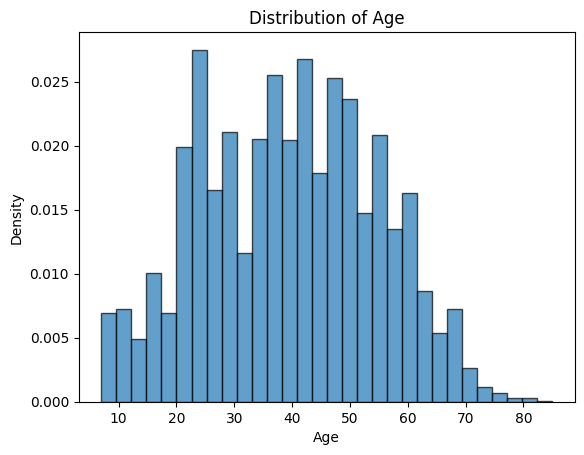

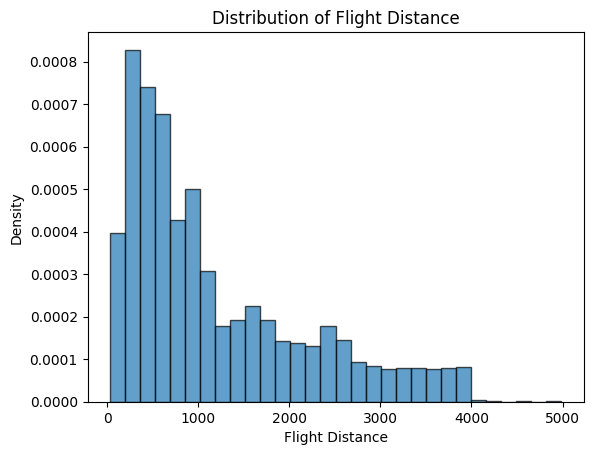

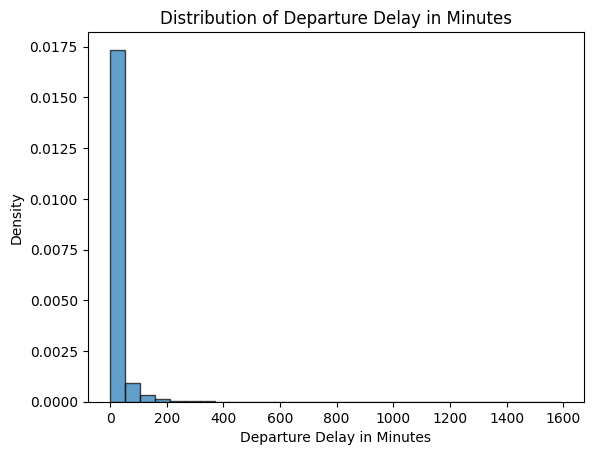

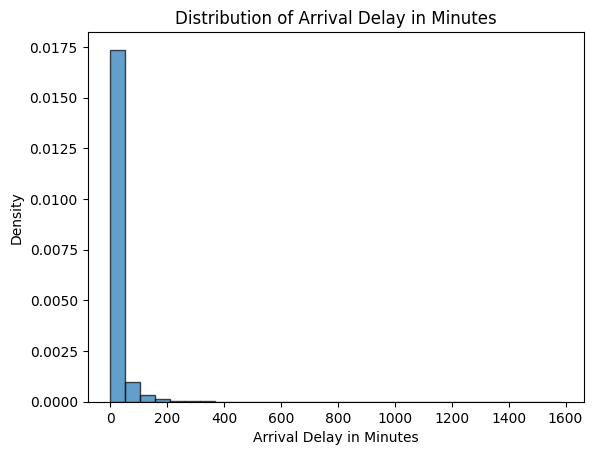

In [73]:
column_names = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

def plot_histogram(dataframe, column_name):
    for column_name in column_names:
      plt.hist(dataframe[column_name], 
              bins=30,
              density=True, 
              alpha=0.7, 
              edgecolor='black')
      plt.title(f'Distribution of {column_name}')
      plt.xlabel(column_name)
      plt.ylabel('Density')
      plt.show()

plot_histogram(dataframe,column_names)

---
### Age
- The number of children present here is limited.
- There is a noticeable upward trend in count beginning at age 25.
- However, we observe a decline in count from age 58 onwards.
- This suggests that our services are primarily targeting a younger demographic, specifically individuals aged between 25 and 60.
---
### Flight Distance
- It appears that we are primarily operating short-distance flights, as the count of flights covering shorter distances is significantly higher compared to other distance ranges.
---
### Departure Delay and Arrival Delay in Minutes 
- The majority of flights appear to depart on time, resulting in timely arrivals at the desired destinations, with minimal or no arrival delays.
---

<ipython-input-74-cef35e3737a6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot=True, fmt='.2f', linewidths=0.8, cmap="YlGnBu")


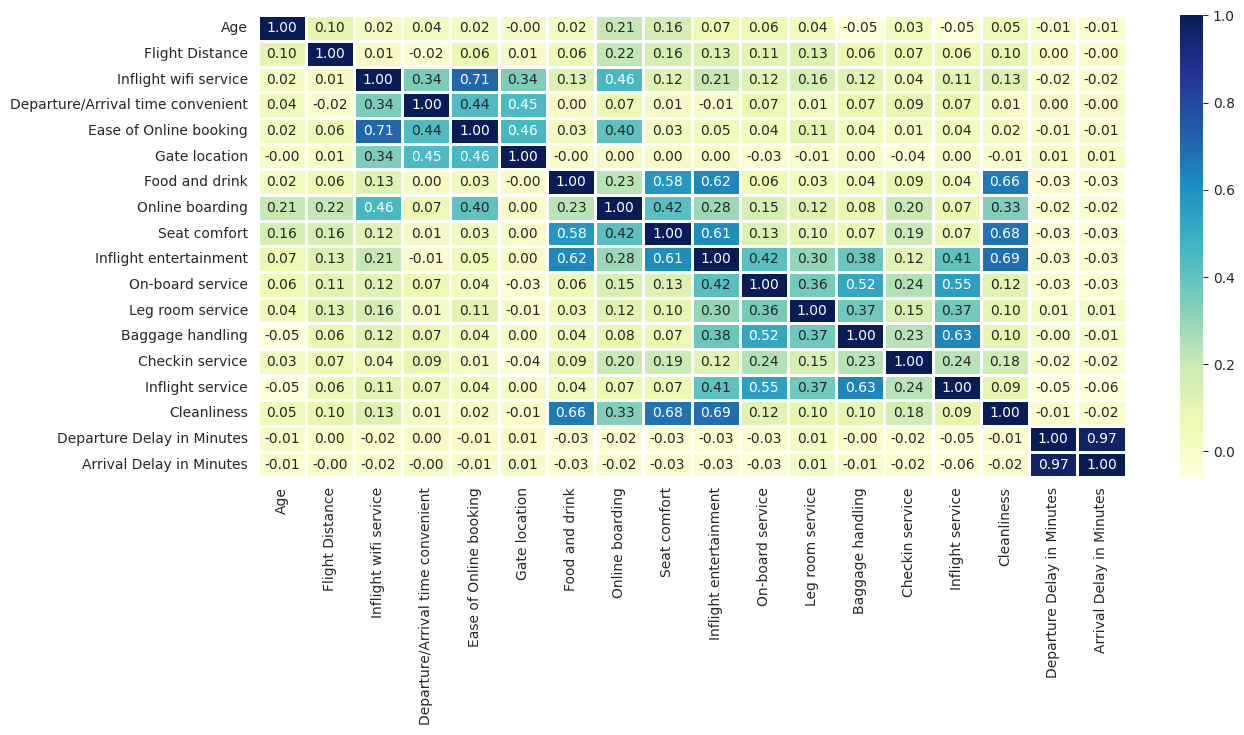

In [74]:
with sns.axes_style('white'):
    plt.figure(figsize=(14, 6))
    sns.heatmap(dataframe.corr(), annot=True, fmt='.2f', linewidths=0.8, cmap="YlGnBu")
    plt.show()


Departure delay and arrival delay exhibit a strong correlation, suggesting that one of them may need to be omitted from the analysis.

In [75]:
# Dropping Departure Delay in Minutes
dataframe.drop('Departure Delay in Minutes', axis=1, inplace= True)

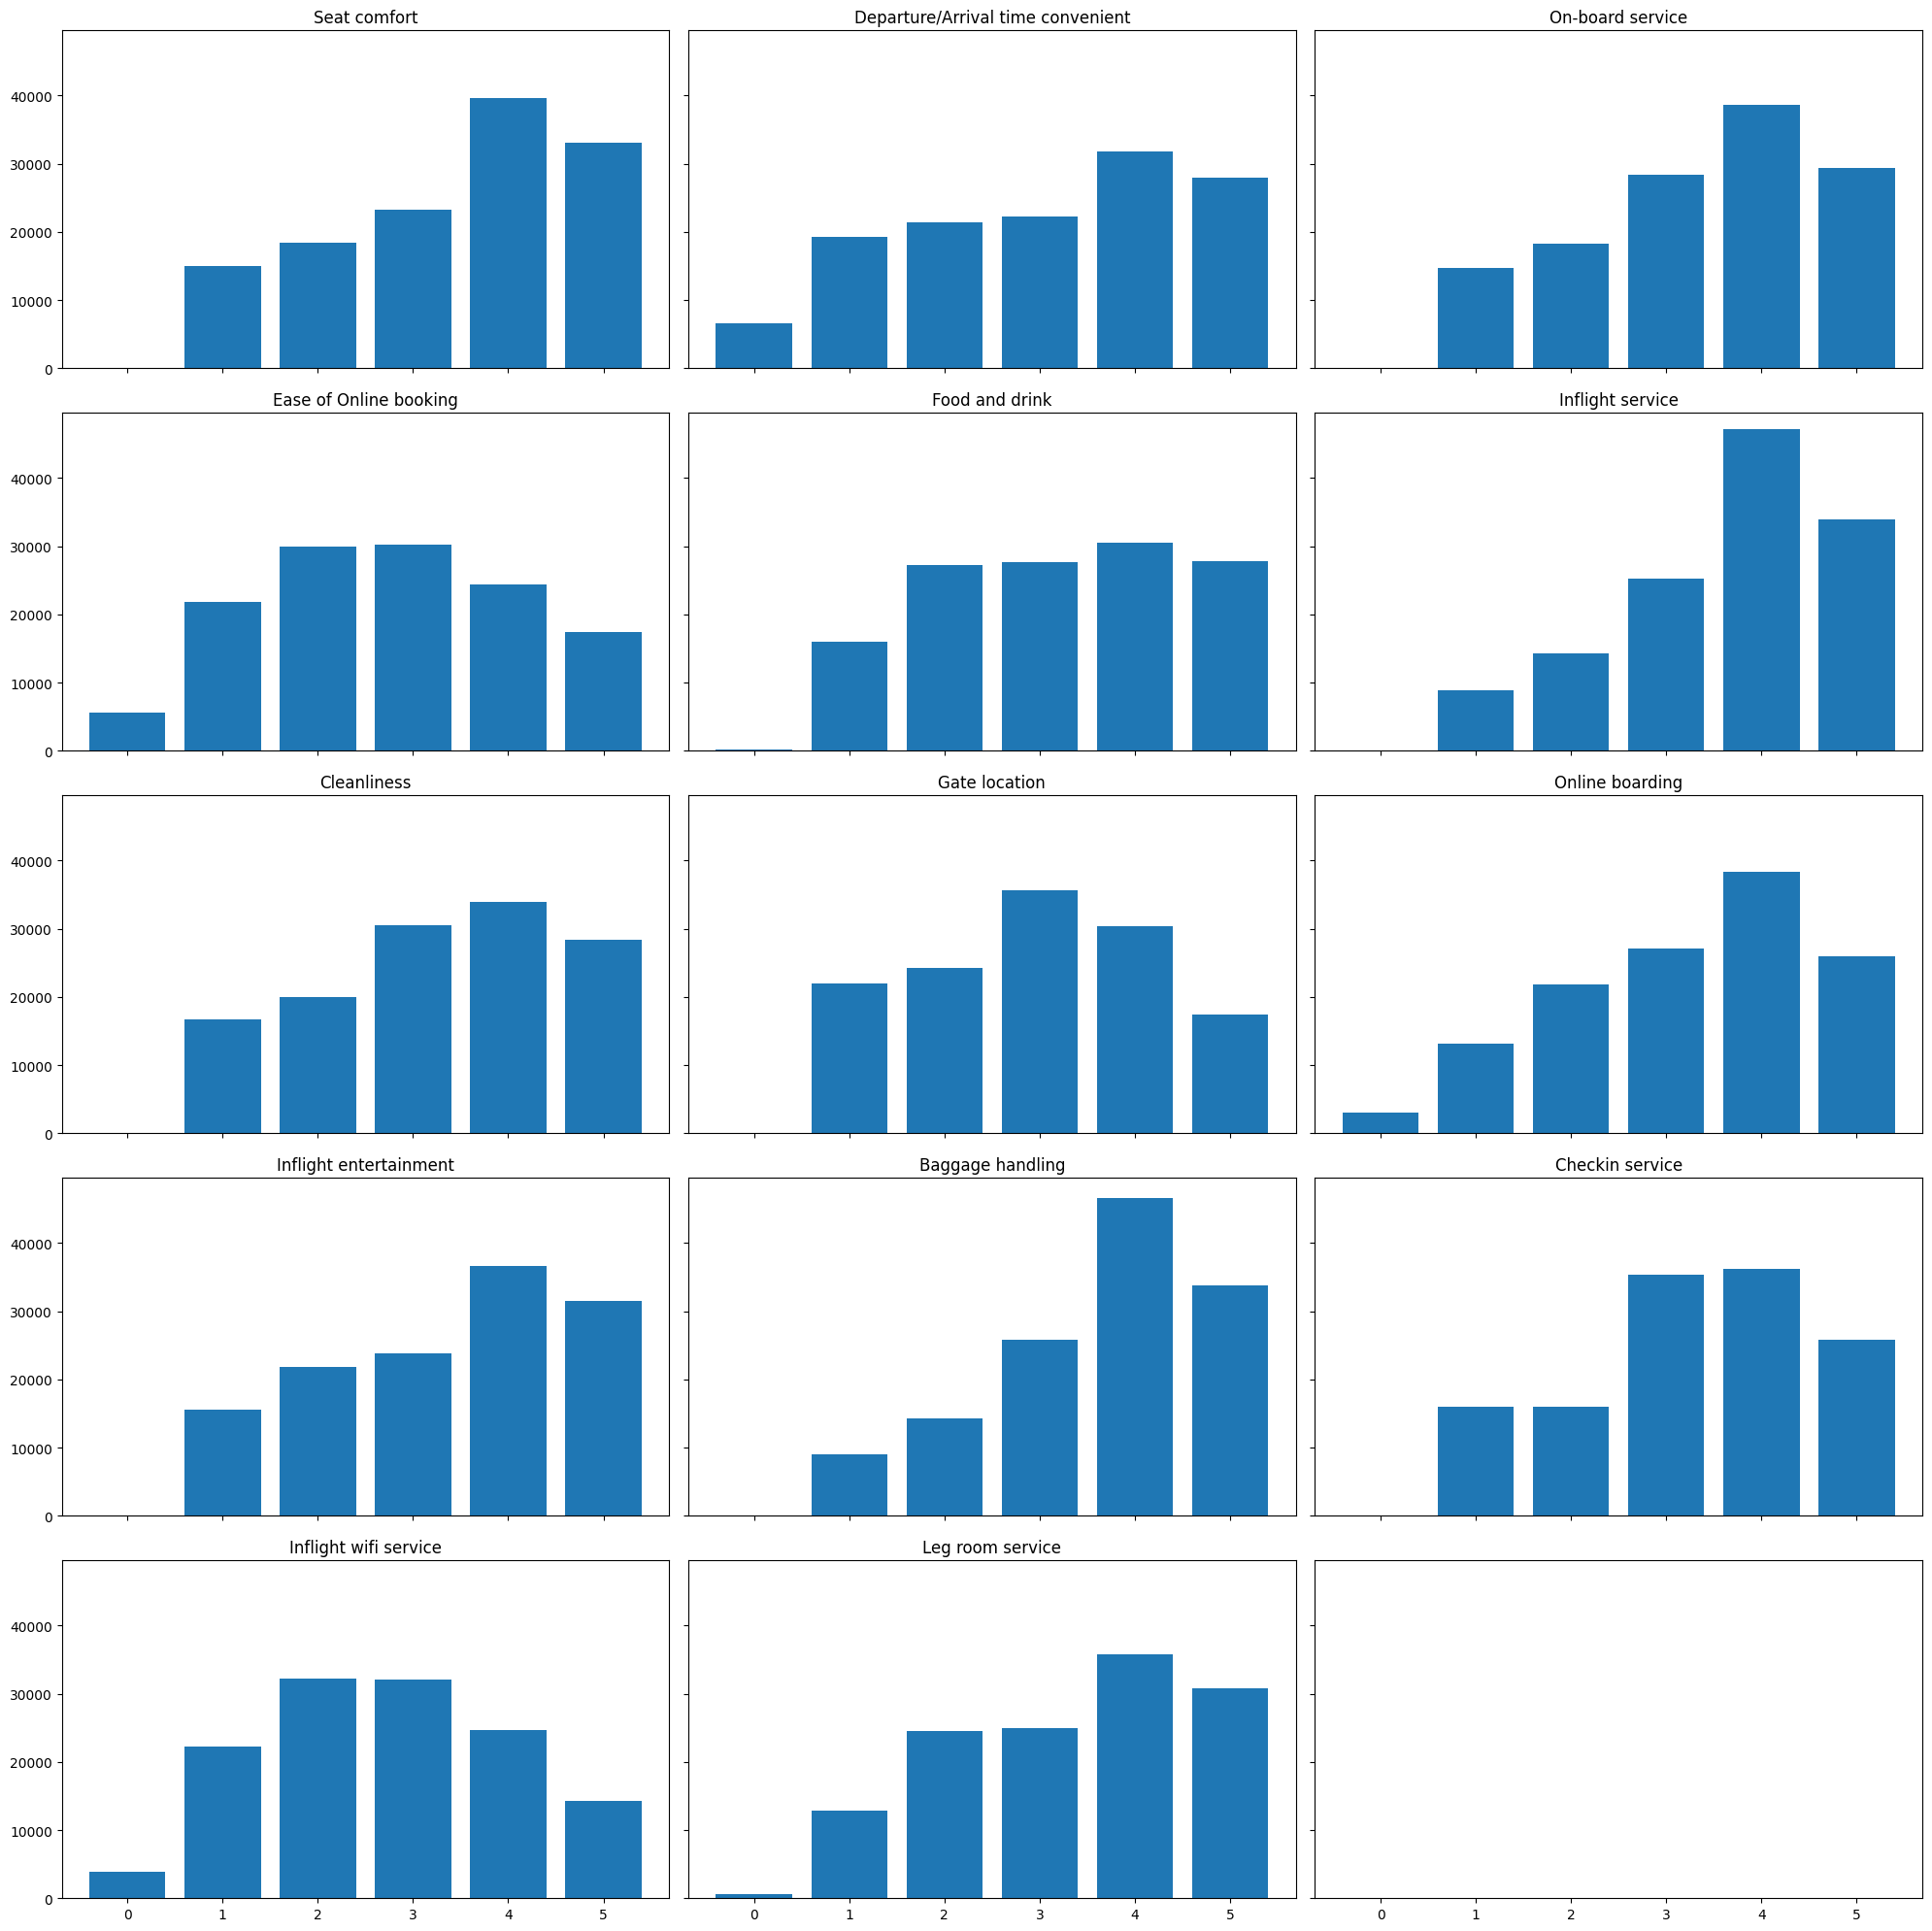

In [76]:
# Create a figure with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharex=True, sharey=True)

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through the selected categories and plot countplots on each subplot
categories = ['Seat comfort', 'Departure/Arrival time convenient', 'On-board service',
              'Ease of Online booking', 'Food and drink', 'Inflight service',
              'Cleanliness', 'Gate location', 'Online boarding',
              'Inflight entertainment', 'Baggage handling', 'Checkin service',
              'Inflight wifi service', 'Leg room service']
for i, category in enumerate(categories):
    axes[i].bar(dataframe[category].value_counts().index, dataframe[category].value_counts().values)
    axes[i].set_title(category)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Call tight_layout() to avoid overlapping labels and titles
plt.tight_layout()

# Show the plot
plt.show()


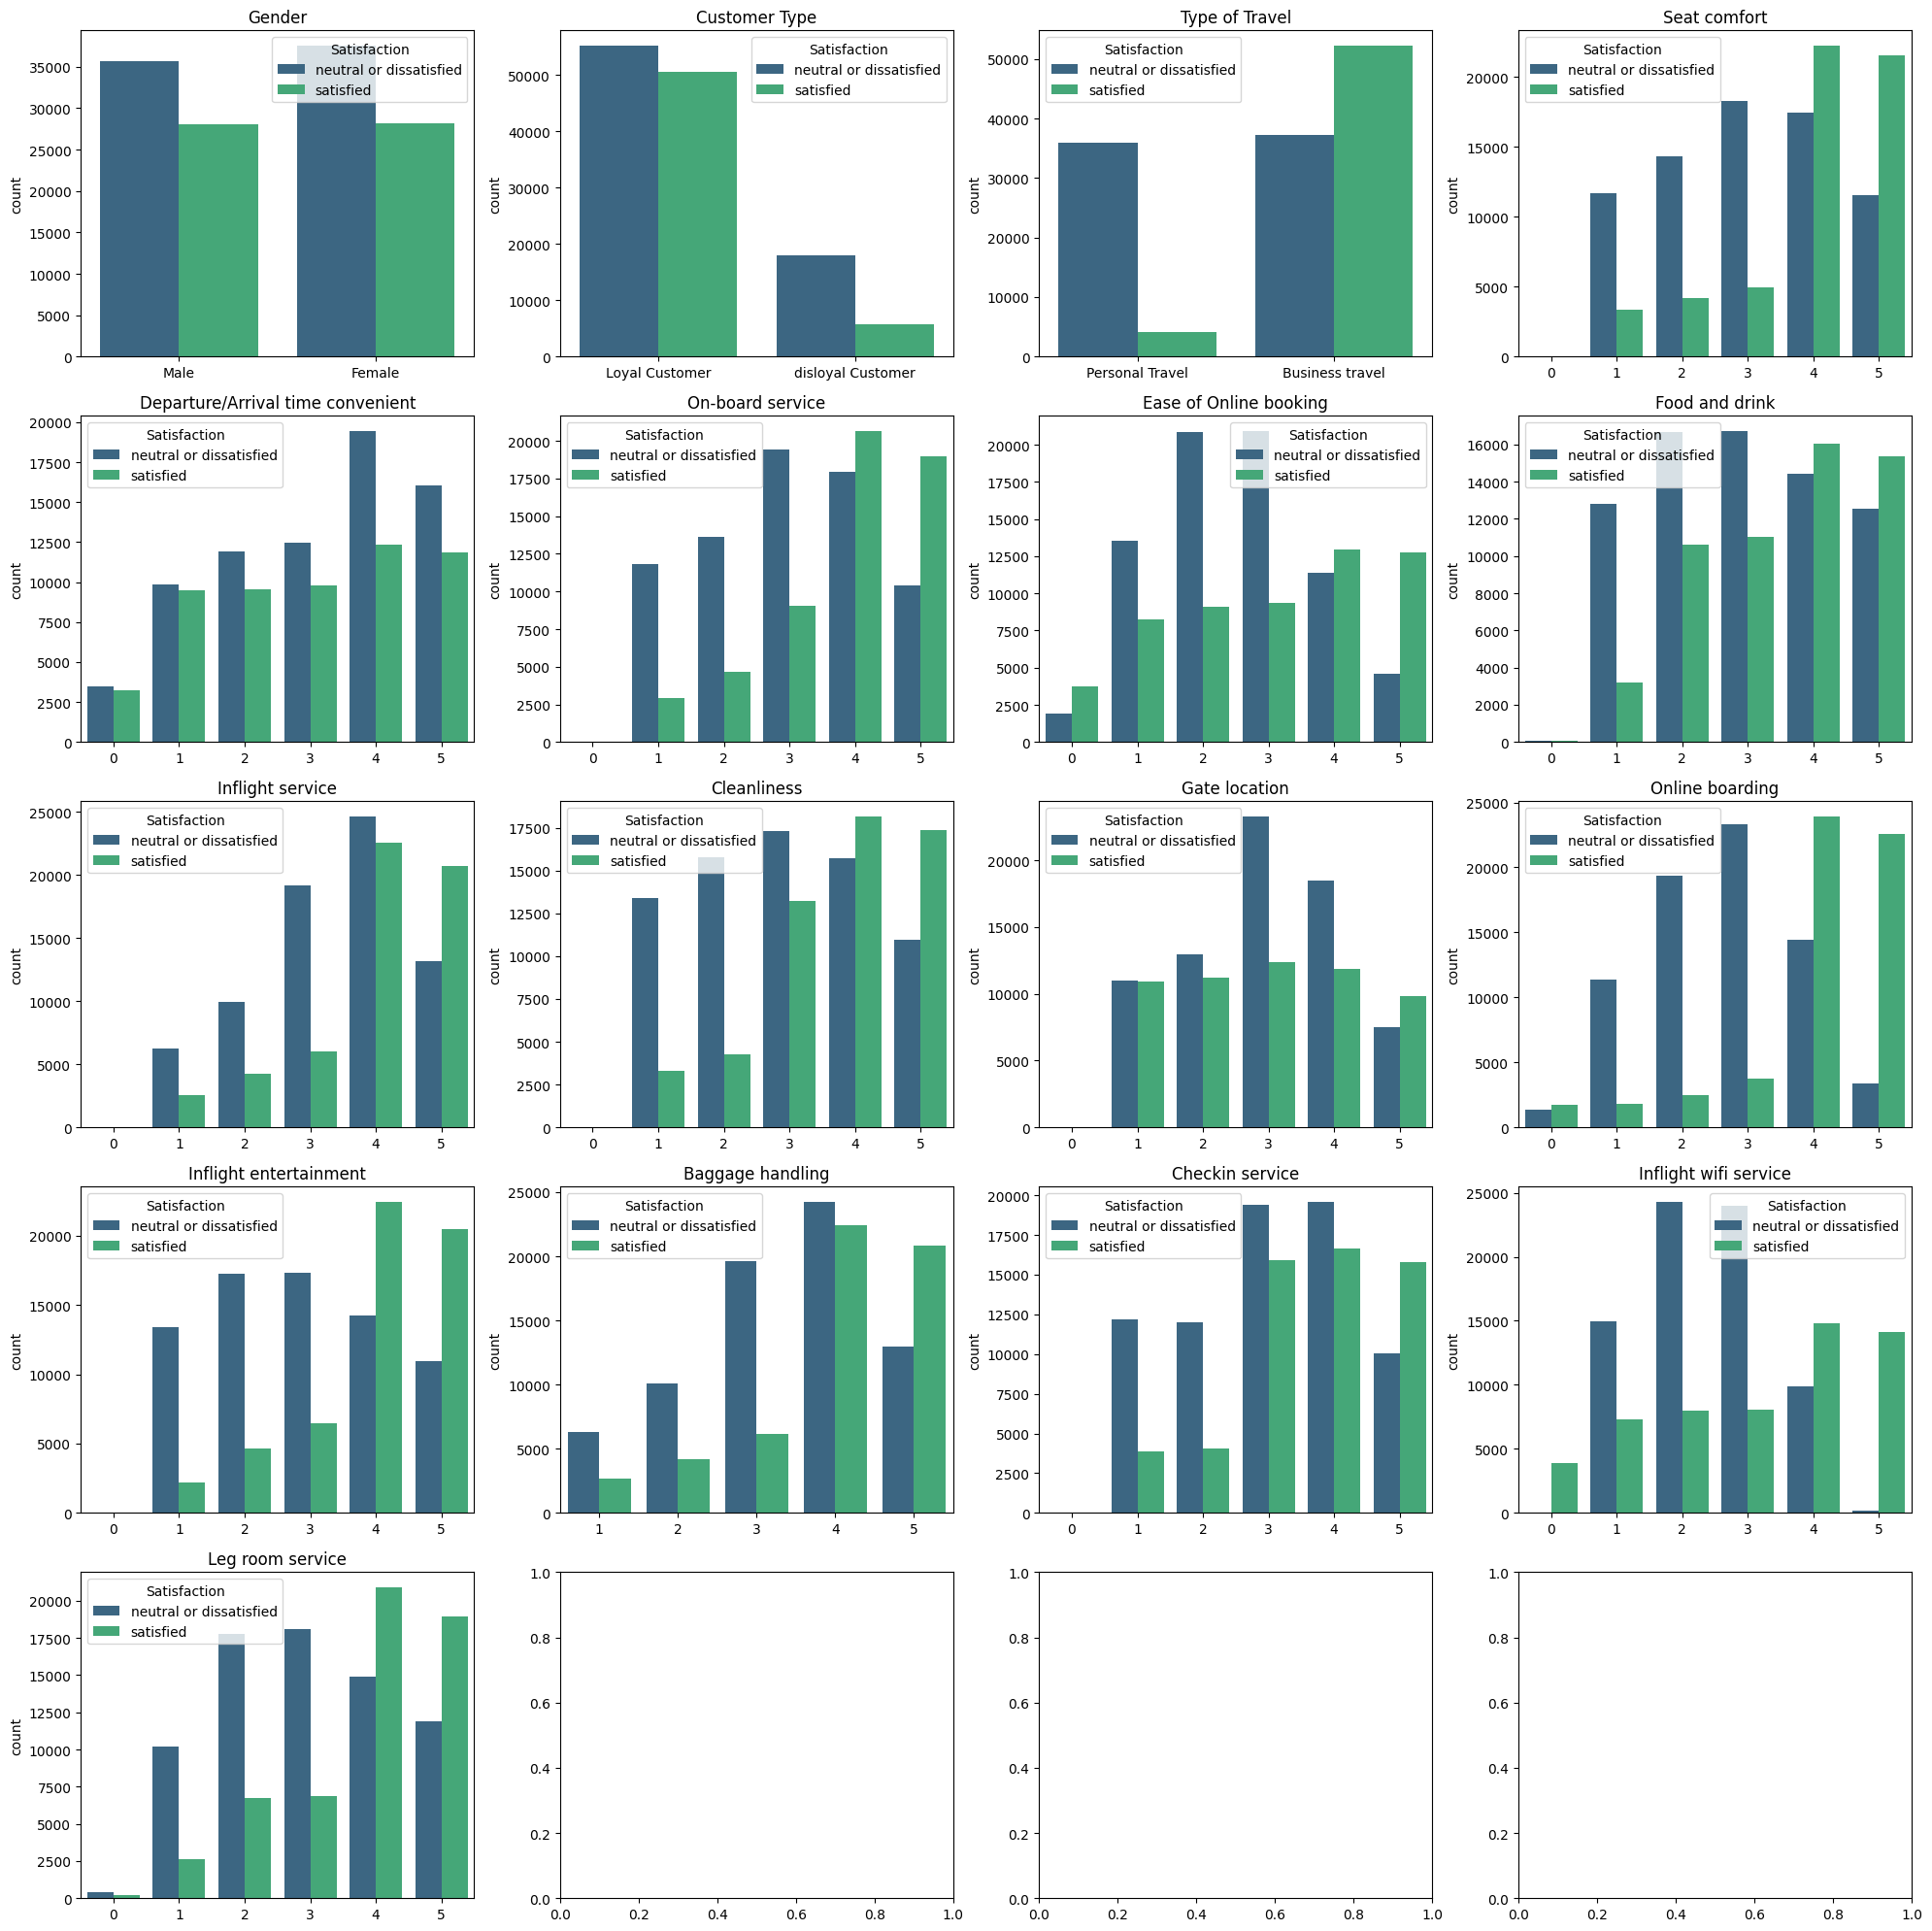

In [77]:
def plot_graphs(sample_data):
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    axes = axes.flatten()  # Flatten the axes array to simplify indexing

    # List of columns to plot
    columns = ['Gender', 'Customer Type', 'Type of Travel',
              'Seat comfort', 'Departure/Arrival time convenient', 'On-board service',
              'Ease of Online booking', 'Food and drink', 'Inflight service',
              'Cleanliness', 'Gate location', 'Online boarding',
              'Inflight entertainment', 'Baggage handling', 'Checkin service',
              'Inflight wifi service', 'Leg room service']

    # Loop through the columns and plot countplots
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=sample_data, hue='satisfaction', palette='viridis', ax=axes[i])
        axes[i].set_title(column)  # Set title for each subplot
        axes[i].legend(title='Satisfaction')  # Add legend with title for each subplot
        axes[i].set_xlabel('')  # Remove x-axis label for better spacing

    plt.tight_layout()  # Optional: adjust the layout of the subplots to prevent overlap
    plt.show()

plot_graphs(dataframe)

- In terms of 'Gender' the satisfaction rate is almost similar for both the genders.
- Although the percentage of loyal customers is significantly higher than that of disloyal customers, it is worth noting that among the loyal customers, the number of customers who had a neutral or dissatisfied experience is higher than the number of satisfied customers.
- Customers who travel for business purposes generally express higher satisfaction levels, while those travelling for personal reasons tend to have lower overall satisfaction with the services.
- Satisfied customers have praised the seating comfort, on-board service, online boarding, inflight service, cleanliness, inflight entertainment, baggage handling, check-in service, and legroom service.
- Irrespective of the convenience ratings for departure/arrival times, the total number of dissatisfied customers is higher.
- Inflight wifi service, gate location, and ease of online booking are areas where customers have expressed dissatisfaction.

# Data Pre-processing

In [78]:
dataframe.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3821
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Arrival Delay in Minutes              472
satisfaction                            2
dtype: int64

---
Let's replace the missing values in categorical columns with the mode (most frequent value) of that particular column, where some of the missing values are currently represented by 0.

In [79]:
columns_containing_zero = ['Inflight wifi service', 'Departure/Arrival time convenient',
                           'Ease of Online booking', 'Gate location', 'Food and drink',
                           'Online boarding', 'Seat comfort', 'Inflight entertainment',
                           'On-board service', 'Leg room service', 'Checkin service',
                           'Inflight service', 'Cleanliness']
modes = dataframe[columns_containing_zero].mode()
dataframe[columns_containing_zero] = dataframe[columns_containing_zero].replace({'0': modes})

In [80]:
# As some of the features exhibit skewness, it would be suitable to apply a log transformation to them.
dataframe['Flight Distance'] = np.log1p(dataframe['Flight Distance'])
dataframe['Arrival Delay in Minutes'] = np.log1p(dataframe['Arrival Delay in Minutes'])

In [81]:
# Encoding the categorical features
dataframe['Gender'] = dataframe['Gender'].map({'Male' : 0, 'Female' : 1})
dataframe['Customer Type'] = dataframe['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
dataframe['Type of Travel'] = dataframe['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
dataframe['Class'] = dataframe['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
dataframe['satisfaction'] = dataframe['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

In [82]:
# Randomly sample 1000 values from the dataframe
n_samples = 1000
sampled_data = dataframe.sample(n=n_samples, random_state=0)

X = sampled_data.drop('satisfaction', axis = 1).iloc[:,1:]
y = sampled_data['satisfaction']
X

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
43170,0,27,0,0,7.464510,0,5,0,2,4,0,4,4,3,3,5,4,4,4,0.000000
21338,0,47,1,0,4.682131,5,3,3,3,2,5,4,5,5,5,5,1,5,1,0.000000
28463,0,47,1,2,7.965198,2,2,2,2,3,5,5,4,4,4,4,4,4,5,0.000000
20300,0,49,0,0,7.639161,2,3,2,3,4,4,3,1,1,2,1,2,1,2,0.000000
39398,1,25,1,2,7.237059,1,0,1,5,2,1,2,2,5,4,4,4,5,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51058,0,11,1,2,6.502790,2,2,3,3,2,2,2,2,4,4,4,2,3,2,2.302585
95910,1,43,1,2,7.590852,3,3,3,1,2,3,2,2,5,3,5,4,5,2,0.000000
18255,0,43,1,0,5.991465,4,2,2,2,4,4,4,4,2,3,3,2,5,4,1.609438
1954,0,44,1,0,6.897705,3,2,2,2,3,3,3,3,1,3,3,4,3,3,0.000000


In [83]:
# Split the sampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Printing the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 20)
X_test shape: (300, 20)
y_train shape: (700,)
y_test shape: (300,)


# Gaussian Process Classification

In [84]:
# Defining the kernel function
kernel = C(1.0) * RBF(1.0)

# Creating an instance of GaussianProcessClassifier with the defined kernel
gpc = GaussianProcessClassifier(kernel=kernel)

# Training the model on your dataset
gpc.fit(X_train, y_train)

# Making predictions on new data
y_pred = gpc.predict(X_test)

# Computing prediction probabilities
y_prob = gpc.predict_proba(X_test)

# Accessing model parameters and properties
kernel_params = gpc.kernel_.get_params() # Get the hyperparameters of the kernel
print("Kernel Parameters: \n")
kernel_params_str = str(kernel_params)[1:-1].replace(", '", "\n'")
print(kernel_params_str)


Kernel Parameters: 

'k1': 13.6**2
'k2': RBF(length_scale=14.3)
'k1__constant_value': 184.2488255741435
'k1__constant_value_bounds': (1e-05, 100000.0)
'k2__length_scale': 14.324188101900205
'k2__length_scale_bounds': (1e-05, 100000.0)


In [85]:
# Accessing the predicted probabilities for each class
positive_class_probs = y_prob[:, 1] # Probabilities of the satisfied class
negative_class_probs = y_prob[:, 0] # Probabilities of the neutral or dissatisfied class

# Setting a threshold to make binary decisions
threshold = 0.2
y_pred_binary = (positive_class_probs > threshold).astype(int) # Binary predictions

# Computing accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy - ", accuracy)
print("\n")
classification_report_result = classification_report(y_test, y_pred_binary)
print("Classification Report: \n")
print(classification_report_result)

Accuracy -  0.77


Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.64      0.76       175
           1       0.65      0.95      0.78       125

    accuracy                           0.77       300
   macro avg       0.80      0.80      0.77       300
weighted avg       0.83      0.77      0.77       300



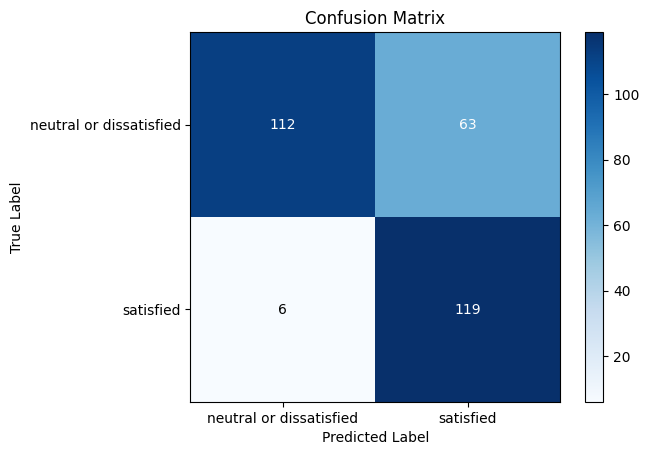

In [86]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Defining labels for the plot
class_names = ['neutral or dissatisfied', 'satisfied']

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding text for each cell in the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

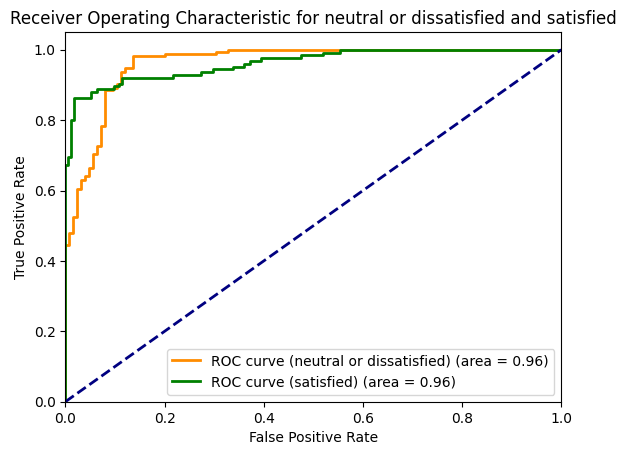

In [87]:
# Computing ROC curve and AUC score for neutral or dissatisfied
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Computing ROC curve and AUC score for satisfied
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plotting ROC curves for both classes
plt.figure()
plt.plot(fpr_0, tpr_0, color='darkorange', lw=2, label='ROC curve (neutral or dissatisfied) (area = %0.2f)' % roc_auc_0)
plt.plot(fpr_1, tpr_1, color='green', lw=2, label='ROC curve (satisfied) (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for neutral or dissatisfied and satisfied')
plt.legend(loc="lower right")
plt.show()

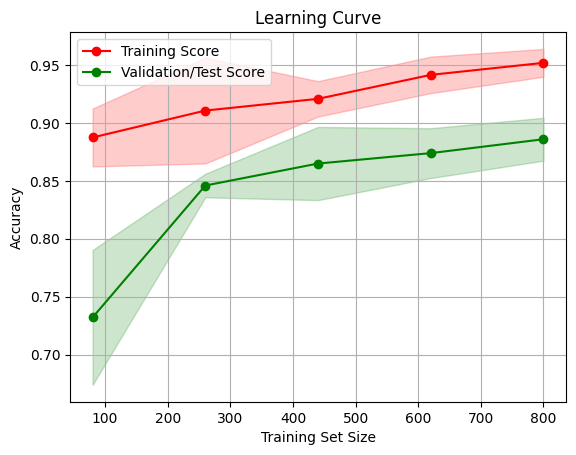

In [88]:
def plot_learning_curve(model, X, y, cv, scoring):

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)

    # Calculating mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting learning curve
    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation/Test Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(gpc, X, y, cv=5, scoring='accuracy')

In [89]:
# Accessing model uncertainty estimation
prediction_variances = gpc.predict_proba(X_test).var(axis=1)
#print(prediction_variances)

# Getting the attribute names
attribute_names = X_test.columns

# Creating a dictionary to store the uncertain attributes and their corresponding variances
uncertain_attributes = {}

# Looping through the attribute names and their variances
for i in range(len(attribute_names)):
    attribute_name = attribute_names[i]
    attribute_variance = prediction_variances[i]
    
    # Checking if the attribute's variance is above a certain threshold (indicating uncertainty)
    if attribute_variance > threshold:
        uncertain_attributes[attribute_name] = attribute_variance

# Sorting the uncertain attributes by variance in descending order
uncertain_attributes = dict(sorted(uncertain_attributes.items(), key=lambda item: item[1], reverse=True))

# Printing the uncertain attributes and their variances
print("Uncertain Attributes:")
for attribute, variance in uncertain_attributes.items():
    print(attribute, ": Variance =", variance)

Uncertain Attributes:
Age : Variance = 0.24666156226581007
Class : Variance = 0.24445994496189036
Inflight service : Variance = 0.23230013961159116
Food and drink : Variance = 0.2302432096741729
Inflight wifi service : Variance = 0.21961754349750806
Online boarding : Variance = 0.20484601721903298


# Bayesian Process Classification

In [90]:
# Creating an instance of Bernoulli Naive Bayes classifier
bayesian_classifier = BernoulliNB()

# Training the model on dataset
bayesian_classifier.fit(X_train, y_train)

# Making predictions on test data
y_pred = bayesian_classifier.predict(X_test)

# Computing prediction probabilities
y_prob = bayesian_classifier.predict_proba(X_test)

# Accessing the predicted probabilities for each class
positive_class_probs = y_prob[:, 1] # Probabilities of the satisfied
negative_class_probs = y_prob[:, 0] # Probabilities of the neutral or dissatisfied

# Setting a threshold to make binary decisions
threshold = 0.5
y_pred_binary = (positive_class_probs > threshold).astype(int) # Binary predictions

# Computing accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy - ", accuracy)
print("\n")
classification_report_result = classification_report(y_test, y_pred_binary)
print("Classification Report: \n")
print(classification_report_result)

Accuracy -  0.77


Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       175
           1       0.71      0.77      0.74       125

    accuracy                           0.77       300
   macro avg       0.76      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



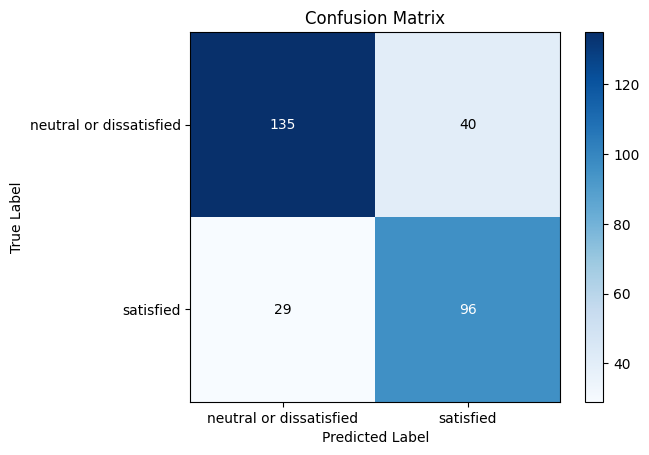

In [91]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Defining labels for the plot
class_names = ['neutral or dissatisfied', 'satisfied']

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding text for each cell in the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

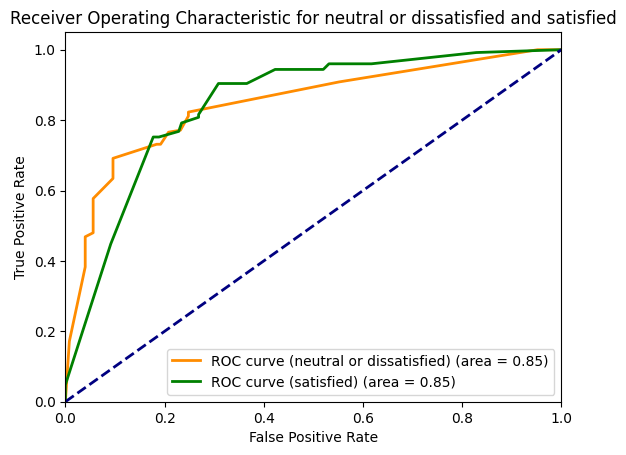

In [92]:
# Computing ROC curve and AUC score for neutral or dissatisfied
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Computing ROC curve and AUC score for satisfied
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plotting ROC curves for both classes
plt.figure()
plt.plot(fpr_0, tpr_0, color='darkorange', lw=2, label='ROC curve (neutral or dissatisfied) (area = %0.2f)' % roc_auc_0)
plt.plot(fpr_1, tpr_1, color='green', lw=2, label='ROC curve (satisfied) (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for neutral or dissatisfied and satisfied')
plt.legend(loc="lower right")
plt.show()

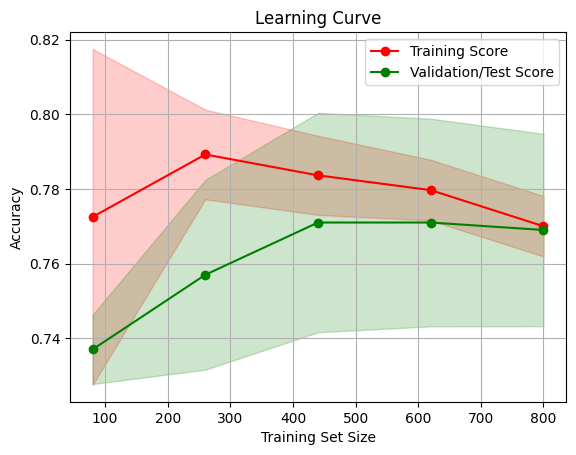

In [93]:
# Plotting learning curve
plot_learning_curve(bayesian_classifier, X, y, cv=5, scoring='accuracy')

In [94]:
# Accessing model uncertainty estimation
prediction_variances = bayesian_classifier.predict_proba(X_test).var(axis=1)

# Defining threshold for variance to indicate uncertainty
threshold = 0.2

# Creating a dictionary to store the uncertain attributes and their corresponding variances
uncertain_attributes = {}

# Looping through the attribute names and their variances
for i in range(len(attribute_names)):
    attribute_name = attribute_names[i]
    attribute_variance = prediction_variances[i]
    
    # Checking if the attribute's variance is above the threshold (indicating uncertainty)
    if attribute_variance > threshold:
        uncertain_attributes[attribute_name] = attribute_variance

# Sorting the uncertain attributes by variance in descending order
uncertain_attributes = dict(sorted(uncertain_attributes.items(), key=lambda item: item[1], reverse=True))

# Printing the uncertain attributes and their variances
print("Uncertain Attributes:")
for attribute, variance in uncertain_attributes.items():
    print(attribute, ": Variance =", variance)

Uncertain Attributes:
Ease of Online booking : Variance = 0.2028474224687738
Gate location : Variance = 0.2028474224687738
Online boarding : Variance = 0.2028474224687738
Cleanliness : Variance = 0.2028474224687738


# Random Forest Classifier

In [95]:
# Creating an instance of Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Training the model on the dataset
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Computing prediction probabilities
y_prob = rf_classifier.predict_proba(X_test)

# Accessing the predicted probabilities for each class
positive_class_probs = y_prob[:, 1] # Probabilities of the satisfied
negative_class_probs = y_prob[:, 0] # Probabilities of the neutral or dissatisfied

# Setting a threshold to make binary decisions
threshold = 0.5
y_pred_binary = (positive_class_probs > threshold).astype(int) # Binary predictions

# Computing accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: ", accuracy)
print("\n")
classification_report_result = classification_report(y_test, y_pred_binary)
print("Classification Report: \n")
print(classification_report_result)

Accuracy:  0.9133333333333333


Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       175
           1       0.94      0.85      0.89       125

    accuracy                           0.91       300
   macro avg       0.92      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300



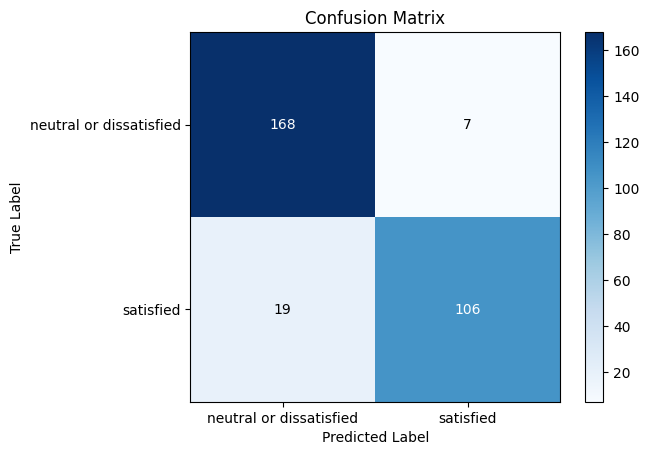

In [96]:
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Defining labels for the plot
class_names = ['neutral or dissatisfied', 'satisfied']

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding text for each cell in the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

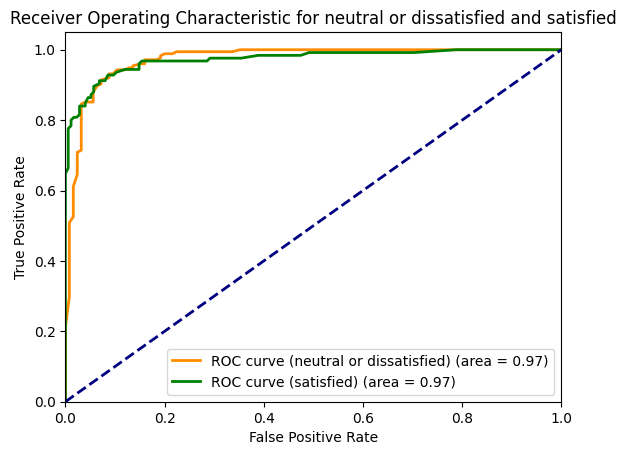

In [97]:
# Computing ROC curve and AUC score for neutral or dissatisfied
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Computing ROC curve and AUC score for satisfied
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plotting ROC curves for both classes
plt.figure()
plt.plot(fpr_0, tpr_0, color='darkorange', lw=2, label='ROC curve (neutral or dissatisfied) (area = %0.2f)' % roc_auc_0)
plt.plot(fpr_1, tpr_1, color='green', lw=2, label='ROC curve (satisfied) (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for neutral or dissatisfied and satisfied')
plt.legend(loc="lower right")
plt.show()

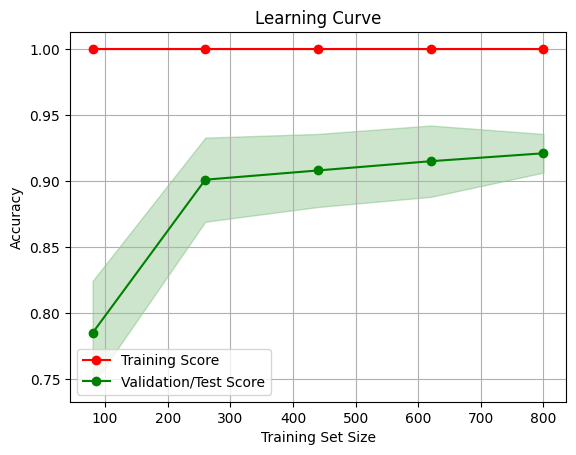

In [98]:
# Plotting learning curve
plot_learning_curve(rf_classifier, X, y, cv=5, scoring='accuracy')

In [99]:
# Accessing model uncertainty estimation
prediction_variances = rf_classifier.predict_proba(X_test).var(axis=1)

# Defining threshold for variance to indicate uncertainty
threshold = 0.2

# Creating a dictionary to store the uncertain attributes and their corresponding variances
uncertain_attributes = {}

# Looping through the attribute names and their variances
for i in range(len(attribute_names)):
    attribute_name = attribute_names[i]
    attribute_variance = prediction_variances[i]
    
    # Checking if the attribute's variance is above the threshold (indicating uncertainty)
    if attribute_variance > threshold:
        uncertain_attributes[attribute_name] = attribute_variance

# Sorting the uncertain attributes by variance in descending order
uncertain_attributes = dict(sorted(uncertain_attributes.items(), key=lambda item: item[1], reverse=True))

# Printing the uncertain attributes and their variances
print("Uncertain Attributes:")
for attribute, variance in uncertain_attributes.items():
    print(attribute, ": Variance =", variance)


Uncertain Attributes:
Age : Variance = 0.25
Class : Variance = 0.25
Food and drink : Variance = 0.25
Inflight wifi service : Variance = 0.24009999999999998
Leg room service : Variance = 0.24009999999999998
Inflight service : Variance = 0.24009999999999998
Flight Distance : Variance = 0.2304
Online boarding : Variance = 0.21159999999999998
Gate location : Variance = 0.20249999999999999
Seat comfort : Variance = 0.20249999999999999
